# COGS 118A - Final Project

# Music Classification: A Machine Learning Approach

## Group members
    - Arjun A
    - Abishek S
    - Sathija S
    - Nik Y

# Abstract 
Our project aims to produce a music genre classification model. One potential application of this would be to use the model in conjunction with a song recommendation algorithm to provide the best possible experience on music streaming services. The data we use will represent key compositional elements of each song put into numerical form. For example, beats per minute can be represented as a ratio value and “energy level” can be represented on a scale from 1-10. We will preprocess the data to eliminate features that might confuse attempts at classification such as song duration. This feature pruning will require trial and error to determine what features generalize the best. Performance will be measured by examining accuracy, precision, recall, and F1 score.

# Background

Music Genre Classification is something that has been the subject of research for quite some time now. In today’s complex world, where music is often at the forefront of entertainment forms in the country, there exist countless genres, and subgenres of those genres. People want to know what genre the songs they listen to are, whether it is to find a community or to find songs in a similar style. Especially for prominent music streaming apps such as Spotify or Soundcloud, it is often vital to correctly classify songs, and make playlists based on similar genres, although this could be done manually. 

One technique that was used is analyzing the Mel-frequency cepstral coefficients (MFCCs). These coefficients represent what are called the spectral characteristics of the audio signal, and analyzing these was an initial step into music classification. However, they have their drawbacks. We now know that “musical genres, which should be independent of key, are in fact influenced by the fundamental keys of the instruments involved. As a result, genre classifiers based on the MFCC features will be influenced by the dominant keys of the genre, resulting in poor performance on songs in less common keys”<a name="springer"></a>[<sup>[1]</sup>](#springernote).
https://link.springer.com/chapter/10.1007/978-3-642-17832-0_30

Some of the methods that are used now, and are more in tune with what we will be doing, are building models based on the song’s features, such as the year the song came out, the energy level, the “danceability”, among many other features. Common models that are used in genre classification and similar problems are Decision Trees, KNN models, as well as SVMs.

Although we haven't learnt them in class, Neural Networks are also often used and prove to be very effective here. They can achieve 90% accuracy with their mechanisms as shown here <a name="chowdhury"></a>[<sup>[1]</sup>](#chowdhurynote)
https://www.clairvoyant.ai/blog/music-genre-classification-using-cnn


# Problem Statement

Problem Definition: The task is to classify songs into different genres based on their audio features. Genres could include categories like hip-hop, jazz, classical, etc. The problem is to build a model that can learn patterns and characteristics from audio data and accurately assign a genre label to each song. This problem is well defined and can be addressed through ML techniques.

Potential ML Solution: One potential solution is to use classification models to train on a labeled dataset of songs. The model will learn to recognize patterns in the audio features, such as tempo, rhythm, melodic content, and harmonic structure, that are indicative of different genres. Once trained, the model can predict the genre of unlabeled songs.

Quantifiability: The problem of song genre classification is quantifiable since it can be expressed in mathematical or logical terms. For example, the audio features of each song can be represented as numerical values, and the genre labels can be converted from a categorical variable to a one-hot encoding. The goal is to find a function or model that maps the input audio features to the correct genre label.

Measurability: The problem is measurable since it can be evaluated using performance metrics. Accuracy, precision, recall, and F1 score are metrics we learned in class to assess the performance of classification models. By comparing the predicted genres with the ground truth labels, we can observe and measure the accuracy and effectiveness of the model.

Replicability: By using a consistent dataset, splitting it into training and test sets, and employing the same ML algorithms and evaluation metrics, the experiment can be replicated multiple times. This allows for the assessment of the model's performance across different trials and enables us to compare various approaches or improvements.


# Data


https://www.kaggle.com/datasets/cnic92/spotify-past-decades-songs-50s10s?select=2010.csv

This dataset has around 100 songs per year, with features such as the key, danceability, energy, etc. These are the kind of features that we want. 
- This is just part of one entry:
(title) bad guy,
(artist)Billie Eilish,
(GENRE) electropop,
2019,
135,
43,
70,
11,
10
- the genre attribute will be our target
- we want to get rid of unnecessary features

We want to find similar datasets, as 1000 observations is definitely on the lower end, although manageable.



Ultimately we decided on this dataset, which has the same features as the previous one but a much larger sample size: https://www.kaggle.com/datasets/purumalgi/music-genre-classification?resource=download

Note that the genres and their corresponding class numbers are as follows: 
- Acoustic/Folk, 0
- Alt Music, 1
- Blues, 2
- Bollywood, 3
- Country, 4
- Hip Hop, 5
- Indie Alt, 6
- Instrumental, 7
- Metal, 8
- Pop, 9


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Genre_Training.csv")
print("initial size of this DF: ")
print(df.shape)

df.head()

initial size of this DF: 
(17996, 17)


,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


Let's look at one specific observation, just to see what features we are dealing with.

In [6]:
print(df.iloc[0])

Artist Name                                      Bruno Mars
Track Name            That's What I Like (feat. Gucci Mane)
Popularity                                             60.0
danceability                                          0.854
energy                                                0.564
key                                                     1.0
loudness                                             -4.964
mode                                                      1
speechiness                                          0.0485
acousticness                                         0.0171
instrumentalness                                        NaN
liveness                                             0.0849
valence                                               0.899
tempo                                               134.071
duration_in min/ms                                 234596.0
time_signature                                            4
Class                                   

We definitely want to make sure that all column names are in an orderly format, and here some are capitalized and have spaces, while others have underscores and are lowercase. Let's do this now

In [7]:
df.columns= df.columns.str.replace(" ","_").str.lower()
df.head()

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature,class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


Let's drop the duplicates and rows with null values. If performance is not as expected, we can bring some of these back, and fill in null values, in order to have more data points.

In [8]:
df = df.dropna()
df = df.drop_duplicates(subset='track_name')
df

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature,class
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In order to get a very quick peek into which variables have an effect, and which ones may go together, we can take a look at the correlations between each of our input variables. We will only look at the ones with numbers.

<AxesSubplot:>

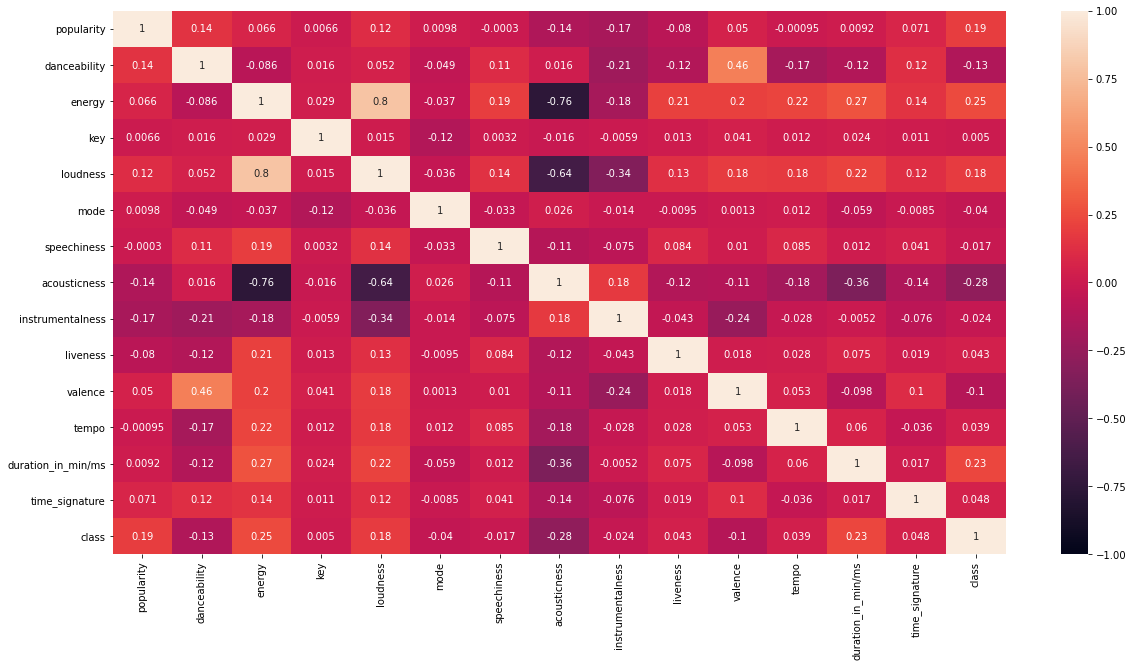

In [9]:
df_for_corr = df.select_dtypes([int,float])

plt.figure(figsize=(20, 10))
sns.heatmap(data = df_for_corr.corr(), vmin = -1, vmax = 1, annot = True) 

From here, we can make some quick observations. For example, we can see that acousticness and energy have the most negative correlation. This makes sense, as if a song is very acoustic, we would naturally expect it to be lower energy. However, besides energy and loudness -- which is again, quite expected -- there doesn't seem to be many others which have a correlation. This simply means that each variable may have its own relavance in regards to identifying the correct class.

# Proposed Solution

We will train both a decision tree neural network, and nearest neighbor model in order to create our final product. Only one of these models will be selected after testing as our final solution. These models are useful for classification problems where there are multiple possible answers as opposed to a binary decision. Neural networks are also powerful tools for predicting on datasets with complex patterns.

The first step will be preprocessing the data and feature selection, with an eye towards which features we foresee being the most predictive in discriminating different genres. This step will also include any encoding on the data.

A nearest neighbor approach would suffer from utilizing too many features as this would increase the dimensionality of the decision space. It may be important to include many different features in order to discern one genre from another and for this reason we foresee our decision tree performing much better as it does not suffer from such drawbacks.

Cross-validation will be used to tune the hyperparameters of both models. Examples of such hyperparameters are the depth of the decision tree and the number of neighbors in our nearest neighbor model. We will also evaluate the confusion matrix of the models in order to better understand what kinds of errors are occurring.
We will not be comparing our results to a benchmark model, rather we will test our models performance by aiming to minimize misclassification errors as well as examining their accuracy, precision, recall, and F1 score.



# Evaluation Metrics

In this classification model, we plan on using the following evaluation metrics:

- Accuracy
- (TP + TN) / (TP + TN + FP + FN)


- Precision
- TP / (TP + FP)


- Recall
- TP / (TP + FN)


- F1 Score
- (2 * Precision * Recall) / (Precision + Recall)

We will use these metrics to evaluate the performance of both the benchmark model and the solution model.


# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Feature Selection and Data


One thing that we wanted to definitely look into, and something we learned very early on in class, was regularization. While some categories in this table definitely shouldn't be regularized, such as the popularity, or the key, a lot of the other more arbitrary values, such as acousticness, would be represented much better in a relative manner.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set_style("darkgrid")
sns.set_context("notebook")

In [11]:
df.head()

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature,class
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2


Now we can create a function to regularize any column we want.

In [12]:
regularized_df = df
regularized_df.head()

def regularize(column):
    max_value = column.max()
    column = column / max_value
    return column

regularized_df['danceability'] = regularize(regularized_df['danceability'])
regularized_df['loudness'] = regularize(regularized_df['loudness'])
regularized_df['speechiness'] = regularize(regularized_df['speechiness'])
regularized_df['danceability'] = regularize(regularized_df['danceability'])
regularized_df

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature,class
1,Boston,Hitch a Ride,54.0,0.386249,0.814,3.0,-5.335793,1,0.043422,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.438827,0.614,6.0,-6.150554,1,0.056150,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.168857,0.975,2.0,-3.157934,1,0.231016,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.237614,0.977,6.0,0.647970,1,0.114439,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.681496,0.658,5.0,-7.119557,0,0.111230,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.167846,0.109,7.0,-12.619926,0,0.044171,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.645096,0.223,11.0,-7.508487,0,0.035187,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.564206,0.981,4.0,-3.456089,0,0.076150,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.217391,0.805,6.0,-9.414760,0,0.143316,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


We also want to drop a few columns, such as the artist_name and track_name, which should have no bearing on the musical genre, given that we know artists can defniitely make multiple genres of music. The track name is also unique and specific to each song, so this provides no info towards genre classification. One thing that we could possibly look at is the words in the title, as there MAY be some correlation, but this would involve some NLP and other techniques that we have not delved into yet.

Now, we can split our data into training and testing and see how it performs in our initial approaches
.

In [37]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['artist_name', 'track_name', 'class', 'mode'])
#X = df[df['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
#X = df.drop(columns = ['artist_name', 'track_name', 'popularity', 'class', 'mode', 'duration_in_min/ms', 'time_signature'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### KNN Approach



In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [18]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)

print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test)

Best parameters:  {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Best accuracy:  0.2997412793603199


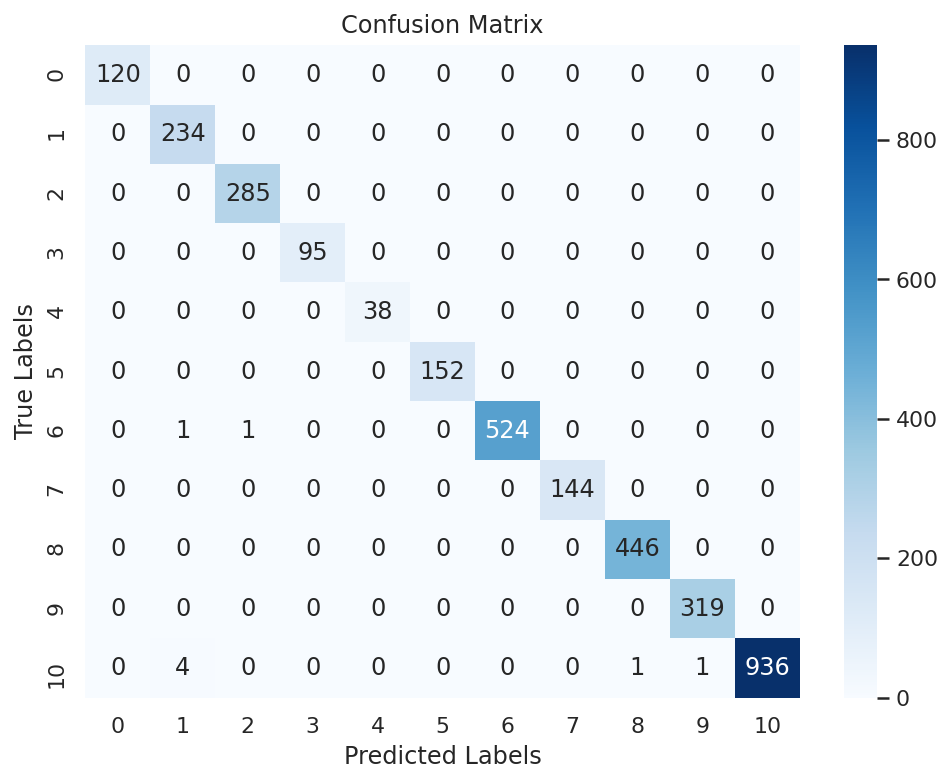

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       0.98      1.00      0.99       234
           2       1.00      1.00      1.00       285
           3       1.00      1.00      1.00        95
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00       152
           6       1.00      1.00      1.00       526
           7       1.00      1.00      1.00       144
           8       1.00      1.00      1.00       446
           9       1.00      1.00      1.00       319
          10       1.00      0.99      1.00       942

    accuracy                           1.00      3301
   macro avg       1.00      1.00      1.00      3301
weighted avg       1.00      1.00      1.00      3301



In [21]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification report
cr = classification_report(y_test, y_pred_knn)
print("Classification Report:\n", cr)

### Decision Tree Approach



In [22]:
param_grid = {
    'max_depth': [None, 3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

tree = DecisionTreeClassifier()

grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X, y)

best_tree = grid_search.best_estimator_
y_pred_tree = best_tree.predict(X_test)

# Print the best parameter combination and the corresponding accuracy
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best parameters:  {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best accuracy:  0.4759060969515242


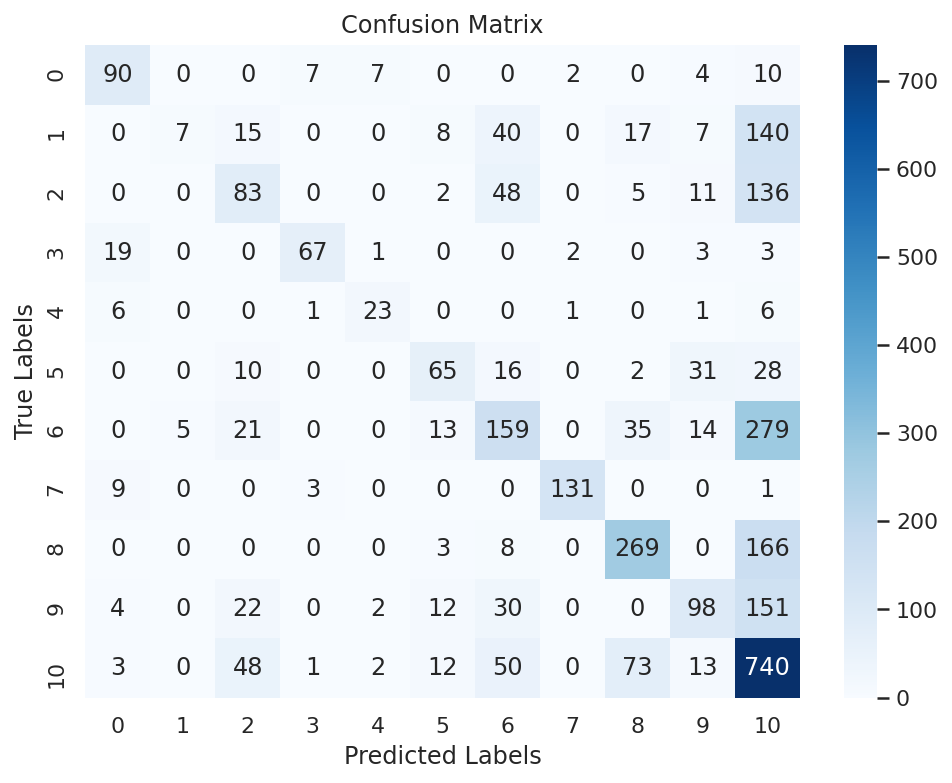

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.75      0.72       120
           1       0.58      0.03      0.06       234
           2       0.42      0.29      0.34       285
           3       0.85      0.71      0.77        95
           4       0.66      0.61      0.63        38
           5       0.57      0.43      0.49       152
           6       0.45      0.30      0.36       526
           7       0.96      0.91      0.94       144
           8       0.67      0.60      0.64       446
           9       0.54      0.31      0.39       319
          10       0.45      0.79      0.57       942

    accuracy                           0.52      3301
   macro avg       0.62      0.52      0.54      3301
weighted avg       0.54      0.52      0.50      3301



In [24]:
# Confusion Matrix for Decision Tree
cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification report
cr = classification_report(y_test, y_pred_tree)
print("Classification Report:\n", cr)


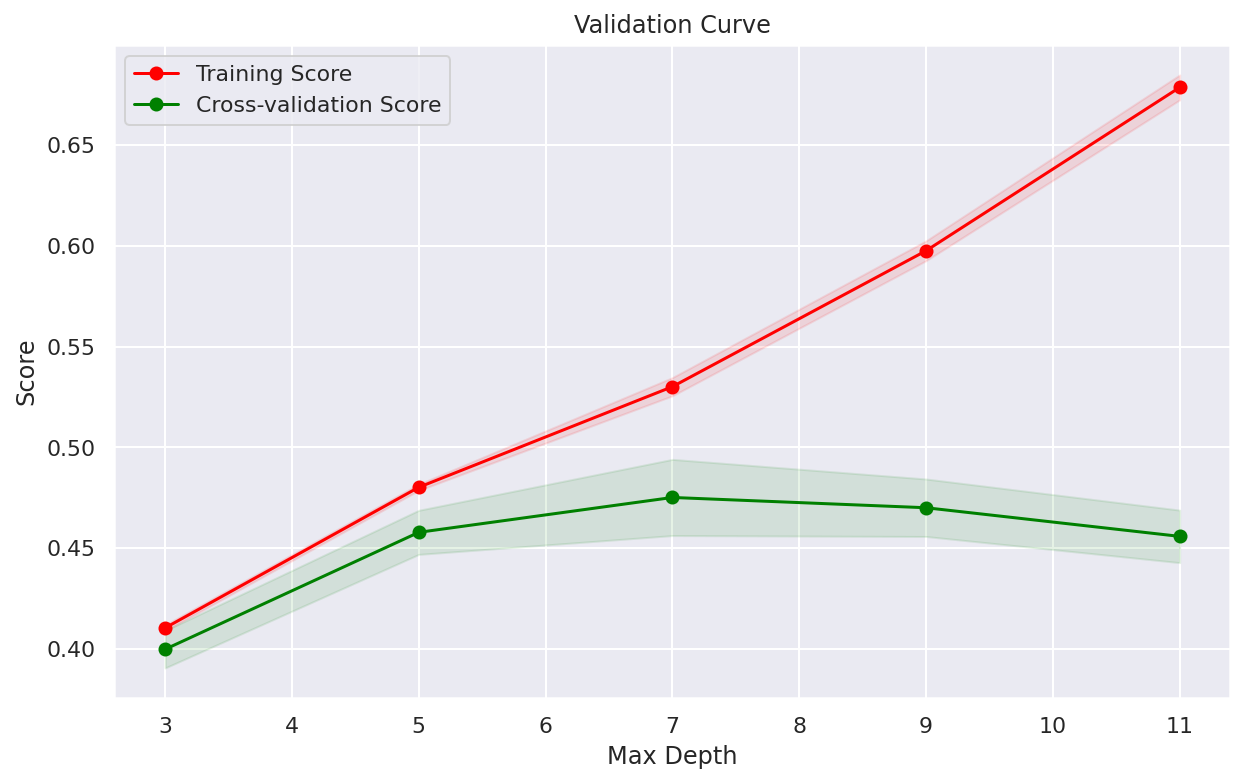

In [25]:
# Validation curve
param_range = [3, 5, 7, 9, 11]  # Max depth of the decision tree to test
train_scores, test_scores = validation_curve(tree, X, y, param_name='max_depth', param_range=param_range, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title('Validation Curve')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.plot(param_range, train_mean, 'o-', color='r', label='Training Score')
plt.plot(param_range, test_mean, 'o-', color='g', label='Cross-validation Score')
plt.legend(loc='best')
plt.show()

### Boosting Approach

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = GradientBoostingClassifier()
model.fit(X_train_scaled, y_train)

y_pred_boost = model.predict(X_test_scaled)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_boost)
print("Accuracy:", accuracy)


Accuracy: 0.5392305362011511


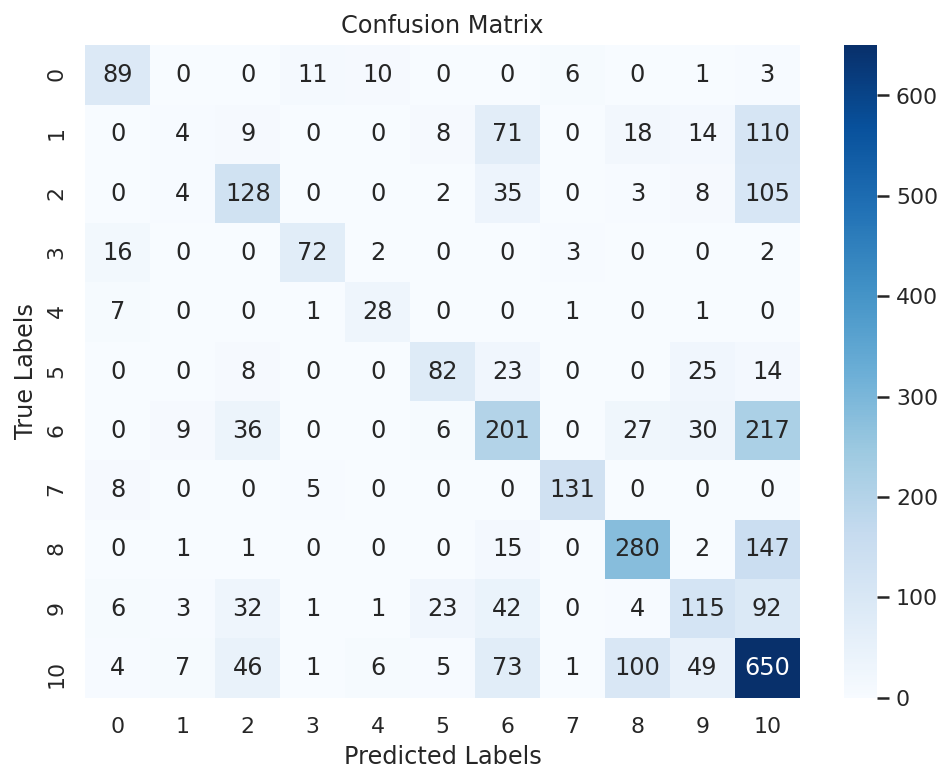

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.74      0.71       120
           1       0.14      0.02      0.03       234
           2       0.49      0.45      0.47       285
           3       0.79      0.76      0.77        95
           4       0.60      0.74      0.66        38
           5       0.65      0.54      0.59       152
           6       0.44      0.38      0.41       526
           7       0.92      0.91      0.92       144
           8       0.65      0.63      0.64       446
           9       0.47      0.36      0.41       319
          10       0.49      0.69      0.57       942

    accuracy                           0.54      3301
   macro avg       0.57      0.56      0.56      3301
weighted avg       0.52      0.54      0.52      3301



In [28]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

This base boosting model had a starting accuracy that was much higher and this makes sense, given what boosting algorithms are truly doing behind the scenes, weighting and reweighting the data. What we wanted to try is to see if we can use an ensemble of these, and see if that outperforms the others.

In [35]:
# Create a list to store the individual models
ensemble_models = []
num_mod = 9

for i in range(num_mod):
    mod = GradientBoostingClassifier()
    Z = df.drop(columns = ['artist_name', 'track_name', 'mode'])
    random_subset = Z.sample(frac = 0.67, random_state = 42)
    y_ens = random_subset['class']
    random_subset = random_subset.drop(columns = ['class'])
    X_train, X_test, y_train, y_test = train_test_split(random_subset, y_ens, test_size=0.33, random_state=42)
    mod.fit(X_train, y_train)
    ensemble_models.append(mod)

In [69]:
from sklearn.model_selection import train_test_split
from scipy import stats

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

X_ens = df.drop(columns = ['artist_name', 'track_name', 'class', 'mode' ])
#X = df[df['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
#X = df.drop(columns = ['artist_name', 'track_name', 'popularity', 'class', 'mode', 'duration_in_min/ms', 'time_signature'])
y_ens = df['class']
X_train, X_test, y_train, y_test = train_test_split(X_ens, y_ens, test_size=0.33, random_state=42)


predictions = []
for index, row in X_test.iterrows():
    prediction_mode = []
    for mod in ensemble_models:
        prediction = mod.predict(np.array(row[['danceability', 'popularity', 'time_signature', 'duration_in_min/ms','energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]).reshape(1,-1))
        prediction_mode = np.append(prediction_mode, prediction)
    mode = stats.mode(prediction_mode)
    predictions = np.append(predictions, mode)
    
y_test = np.array(y_test)

counter = 0
for element1, element2 in zip(predictions, y_test):
    if element1 == element2:
        counter += 1
    if abs(element1 - element2) ==1:
        counter += 0.5
        
acc = counter / len(y_test)

warnings.filterwarnings("default")
acc

0.21917600727052408

### Neural Network Approach

> Here we explore the neural network approach using scikitlearn's multilayer perceptron library. It is important to note that the training was done utilizing Google Clouds Vertex AI free trial in order to access increased processing power (up to 16 CPU's in parallel), and any output seen here was copy pasted from that notebook. Therefore training is likely to time out if run in a notebook without access to high computing power.

> We begin by importing the required libraries. 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import uniform

> Now we use code from our knn and decision tree models to clean the data and encode our categorical variables.

In [32]:
#Reused code from knn and tree models to clean data
df = pd.read_csv("Genre_Training.csv")
print("initial size of this DF: ")
print(df.shape)

df.columns= df.columns.str.replace(" ","_").str.lower()
df = df.dropna()
df = df.drop_duplicates(subset='track_name')

X = df.drop(['class', 'artist_name', 'track_name'], axis=1)
y = df['class']

# Encoding categorical data
X = pd.get_dummies(X)

initial size of this DF: 
(17996, 17)


> Following data cleaning, we split our data into a training and test set and create a parameter distribution in order to do a randomized grid search. We also normalize our data to reduce the impact of outliers. We decided a randomized grid search would be better than exhaustive grid search due to the amount of time required to train each model.

In [33]:
# Split dataset into training set and test set with 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Normalize features using RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Parameter distribution for randomized search
param_distribution = {
    'hidden_layer_sizes': [(x, x, x) for x in np.arange(10, 110, 10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': uniform(0.0001, 0.05),
    'learning_rate': ['constant', 'adaptive'],
}

> Now for the good stuff, we begin our randomized search, iterating over each model up to 3000 times in order to train it. Every available CPU is utilized from the n_jobs=-1 parameter. The amount of models to be fit is 250, from 5 folds over 50 candidates. Then we print the best parameters and predict on our test data, generating a confusion matrix along with precision, f1, and recall scores.

In [35]:
# Create the randomized search model
random_search = RandomizedSearchCV(estimator=MLPClassifier(max_iter=3000), param_distributions=param_distribution, n_iter=50, cv=5, n_jobs=-1, verbose=0)

# Fit the randomized search model to the data
random_search.fit(X_train, y_train)

# Get the optimal parameters
print(random_search.best_params_)

# Predict for test data
predictions = random_search.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perce

{'activation': 'relu', 'alpha': 0.013011035619433231, 'hidden_layer_sizes': (70, 70, 70), 'learning_rate': 'adaptive', 'solver': 'sgd'}
[[ 44   0   0  12   9   0   0   1   0   1   0]
 [  0   3   5   0   0   6  29   0   6  13  67]
 [  0   1  78   0   0   1  14   0   7   3  60]
 [ 12   0   0  38   2   0   0   2   0   0   0]
 [  4   0   0   1  18   0   0   0   0   0   1]
 [  0   2   8   0   0  55  12   0   0  19  13]
 [  0   4  21   0   0  10 108   0  26  28 122]
 [  5   0   0   0   0   0   0  78   0   0   0]
 [  0   1   1   0   0   0  10   0 179   0  91]
 [  3   0  25   0   2  14  30   0   2  76  37]
 [  2   3  30   0   6   2  48   0  60  33 397]]
              precision    recall  f1-score   support

           0       0.63      0.66      0.64        67
           1       0.21      0.02      0.04       129
           2       0.46      0.48      0.47       164
           3       0.75      0.70      0.72        54
           4       0.49      0.75      0.59        24
           5       0.

> Examining our output we see that our accuracy overall is 54%, with recall, precision, and f1 scores varying across different genres. Specifically it seems to be performing very poorly on class 1 which corresponds to Alt music. Let's make the confusion matrix more understandable using seaborn and matplot.

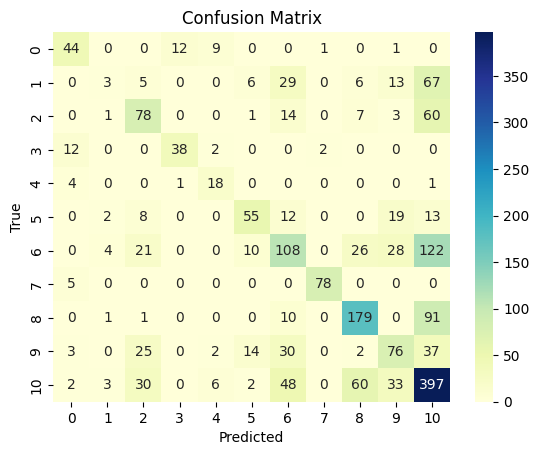

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

> By looking at our confusion matrix we can see that the model is classifying the majority of Alt songs as Pop. This probably has to do with the large amount of songs in the Pop genre in the dataset compared to other categories, along with Pops amorphous nature as a genre. The lines between genres are often fuzzy and in this case have much overlap. The other classes seemed to perform exceedingly well in comparison, although they also suffer from Pop misclassification. Our neural network approach was more successful than our previous approaches likely due to the advantage that neural networks have when predicting on complex patterns.

### Final Analysis

Compare all approaches along with a more in depth explanation of why the neural net probably performed best along with explanations of the other models poor performance.


# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations
The nature of music classification results in data that is often subjective with conflicting patterns. Two songs with very similar metrics can end up in different categories despite their similarities. To illustrate how our data provides confusing patterns let's find two songs with similar metrics which are in different genres. The code has been omitted for brevity.

Snippet of output from similarity code:
> The closest song to 'Shine On You Crazy Diamond (Pts. 1-5)' (Genre: 10) with metrics (popularity: 66.00, danceability: 0.27, energy: 0.29, key: 7.00, loudness: -11.94, mode: 0.00, speechiness: 0.03, acousticness: 0.77, instrumentalness: 0.70, liveness: 0.11, valence: 0.04, tempo: 137.94, duration_in_min/ms: 811077.00, time_signature: 3.00) from a different genre is 'D's' (Genre: 9) with metrics (popularity: 66.00, danceability: 0.27, energy: 0.29, key: 7.00, loudness: -11.94, mode: 0.00, speechiness: 0.03, acousticness: 0.77, instrumentalness: 0.70, liveness: 0.11, valence: 0.04, tempo: 137.94, duration_in_min/ms: 811077.00, time_signature: 3.00). The distance between them is 0.00.

We see that these two songs, despite being in different genres have the exact same metrics. While this is an outlier, cases like this make it impossible to reliably predict a classification using the dataset we've been working with. This problem is compunded because while our features for each are extensive they are not all encompassing. For example there may be features not represented in our dataset that clearly ditinguish these two songs, and upon listening to both it was found that they are in fact quite distinct. Any human would've done what our models could not by placing them in their respective categories.

Another limitation was in our computing power. Even with Google Cloud's Vertex AI workbench training each neural network until it converged was not feasible, nor was expanding our grid search. Having access to GPU's or more CPU's could've given us the compute power we needed to fully leverage our neural net. 

Lastly we come to the size of our dataset. While 17,000 seems large it doesn't even begin to encompass the vast number of music that has been produced. Our data coming from Spotify also limits which songs are represented in the dataset, as not all songs (even those that are well known) are present on the platform.
  


### Ethics & Privacy

The dataset we are using is directly from Kaggle that lists certain attributes in songs taken from a publicly available playlist in Spotify, an audio streaming platform. However, there may be some ethical concerns that arise within a music genre classification model. One issue to address is the ethical concerns around misrepresentation for specific genres. Since we are looking into certain attributes in songs to develop a model that can accurately predict the genre of a given song based on its audio features, we may misrepresent the song to a specific genre that might also fit under another genre. This can lead to disagreements among experts and listeners about specific genre classifications and what criteria should be used to classify each song. The model should acknowledge this subjectivity and inherent diversity in musical tastes, to ultimately avoid oversimplification or misrepresentation of complex genres.

An unintended consequence of this ML model could be music genre bias where the training data being used is biased towards specific genres and not all. We must be careful to ensure the model is trained on diverse and representative data to address and mitigate this bias.


### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Team Expectations 

- Communication: We should all maintain open and effective communication channels within the team. We all need to respond to messages in a timely manner and actively participate in team discussions and meetings.
- Attendance and Punctuality: All members need to attend all team Zoom calls, and arrive on time. If someone is unable to attend, they need to provide advance notice and make sure they catch up on the topics they missed.
- Respect: Treat all team members with respect and ensure that everyone’s opinions are considered.
- Work Quality: Everyone should work on this group project as if it was their own. We should strive to ensure that we try our best to create the highest quality of work for this class.  


# Project Timeline Proposal


| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/17  |  9 AM |  Found topics  | Discuss which topic to work on| 
| 5/13 |  10 AM |  Started Checkpoint Work | Discuss what to change / meeting times | 
| 5/30 |  10 AM |  Finished Checkpoint Work | Finished doing cross validation | 
| 6/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project |
| 6/14  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="springernote"></a>1.[^](#springer): https://link.springer.com/chapter/10.1007/978-3-642-17832-0_30
<a name="chowdhurynote"></a>2.[^](#chowdhury): https://www.clairvoyant.ai/blog/music-genre-classification-using-cnn

